In [132]:
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class
import numpy as np

# 1. Data Source and Contents

In [133]:
df=pd.read_csv('/Users/dftehada/Downloads/census_data.csv')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


Q1. Why does it makes sense to discretize columns for this problem?

It makes sense to discretize the continuous columns in this problem because variables such as age and income level do not require specific values to make decisions. For example, the marginal difference between ages might not move the needle to change a decision, so it is more efficient to bin ages together because more likely than not the outcome will be the same.

Q2. What issues would arise if we did not discretize?

If the columns were not discretized all distinct continuous values would cause too many levels/branches in the decision tree model, therefore making it hard to optimize and require too much computing power to generate.

## 2. Data Quality Analysis (DQA)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [135]:
#Descriptive statistics for each column
df.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Shape of your Data Set loaded: (48842, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  8
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    11 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 4001

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
hours_per_week_bin,object,0.000000,0,,,No issue
occupation_bin,object,0.000000,0,,,No issue
msr_bin,object,0.000000,0,,,No issue
capital_gl_bin,object,0.000000,0,,,No issue
race_sex_bin,object,0.000000,0,,,No issue
education_num_bin,object,0.000000,0,,,No issue
education_bin,object,0.000000,0,,,No issue
workclass_bin,object,0.000000,0,,,No issue
age_bin,object,0.000000,0,,,No issue
flag,object,0.000000,0,,,No issue


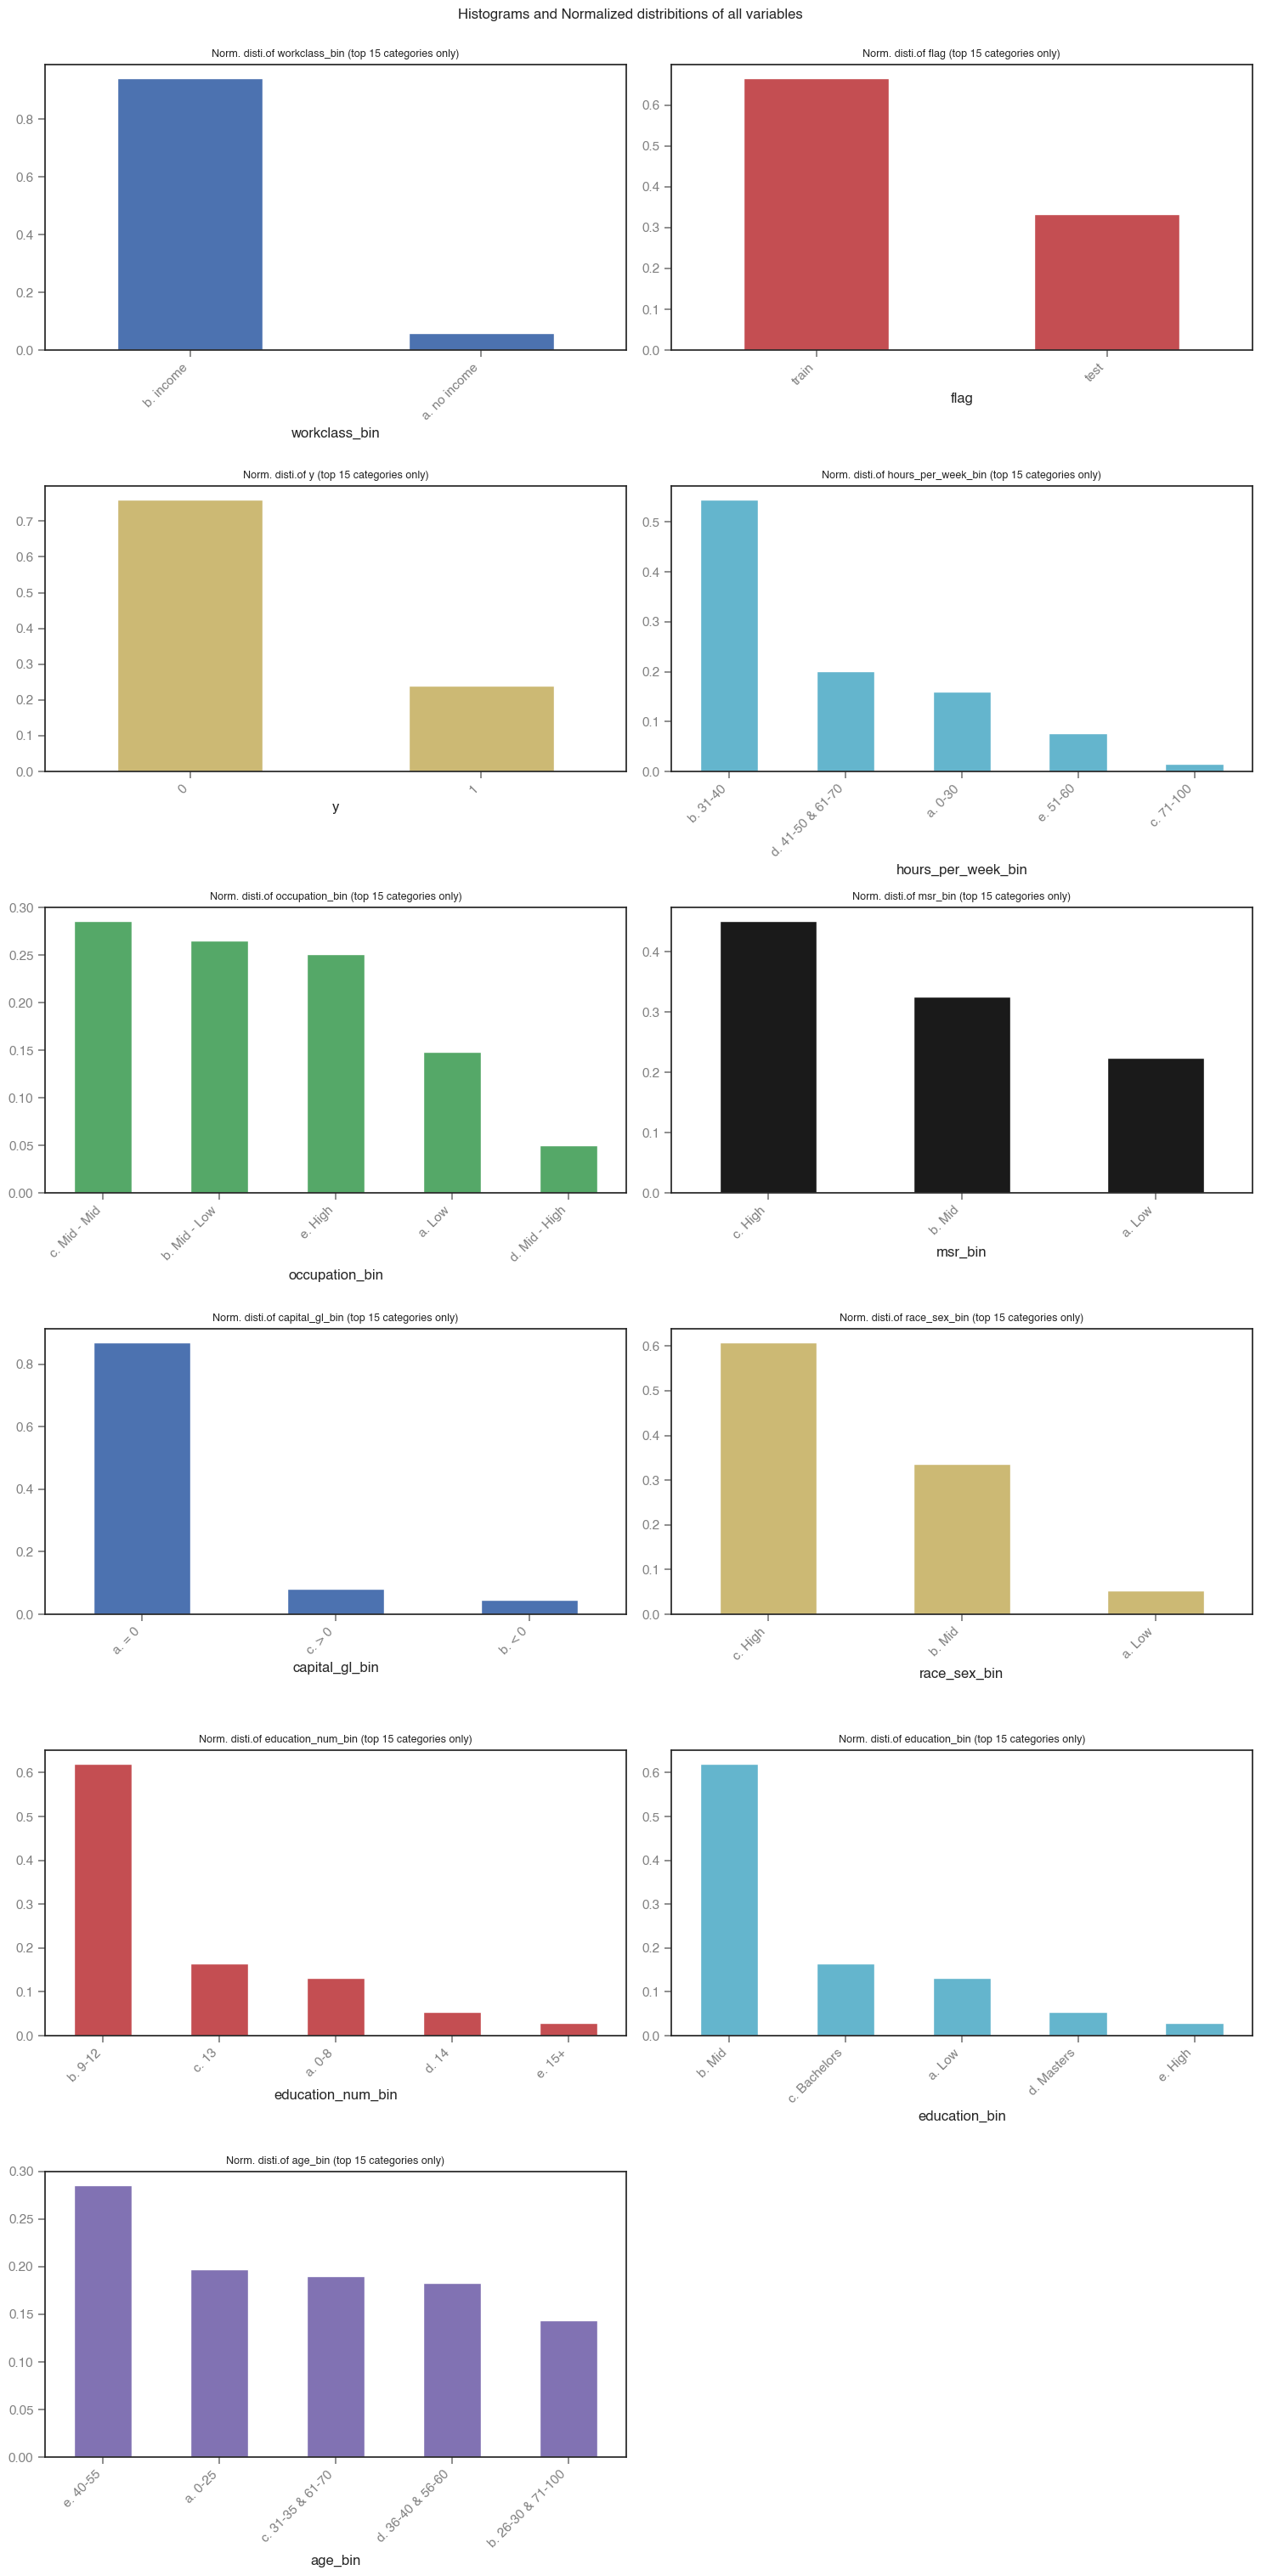

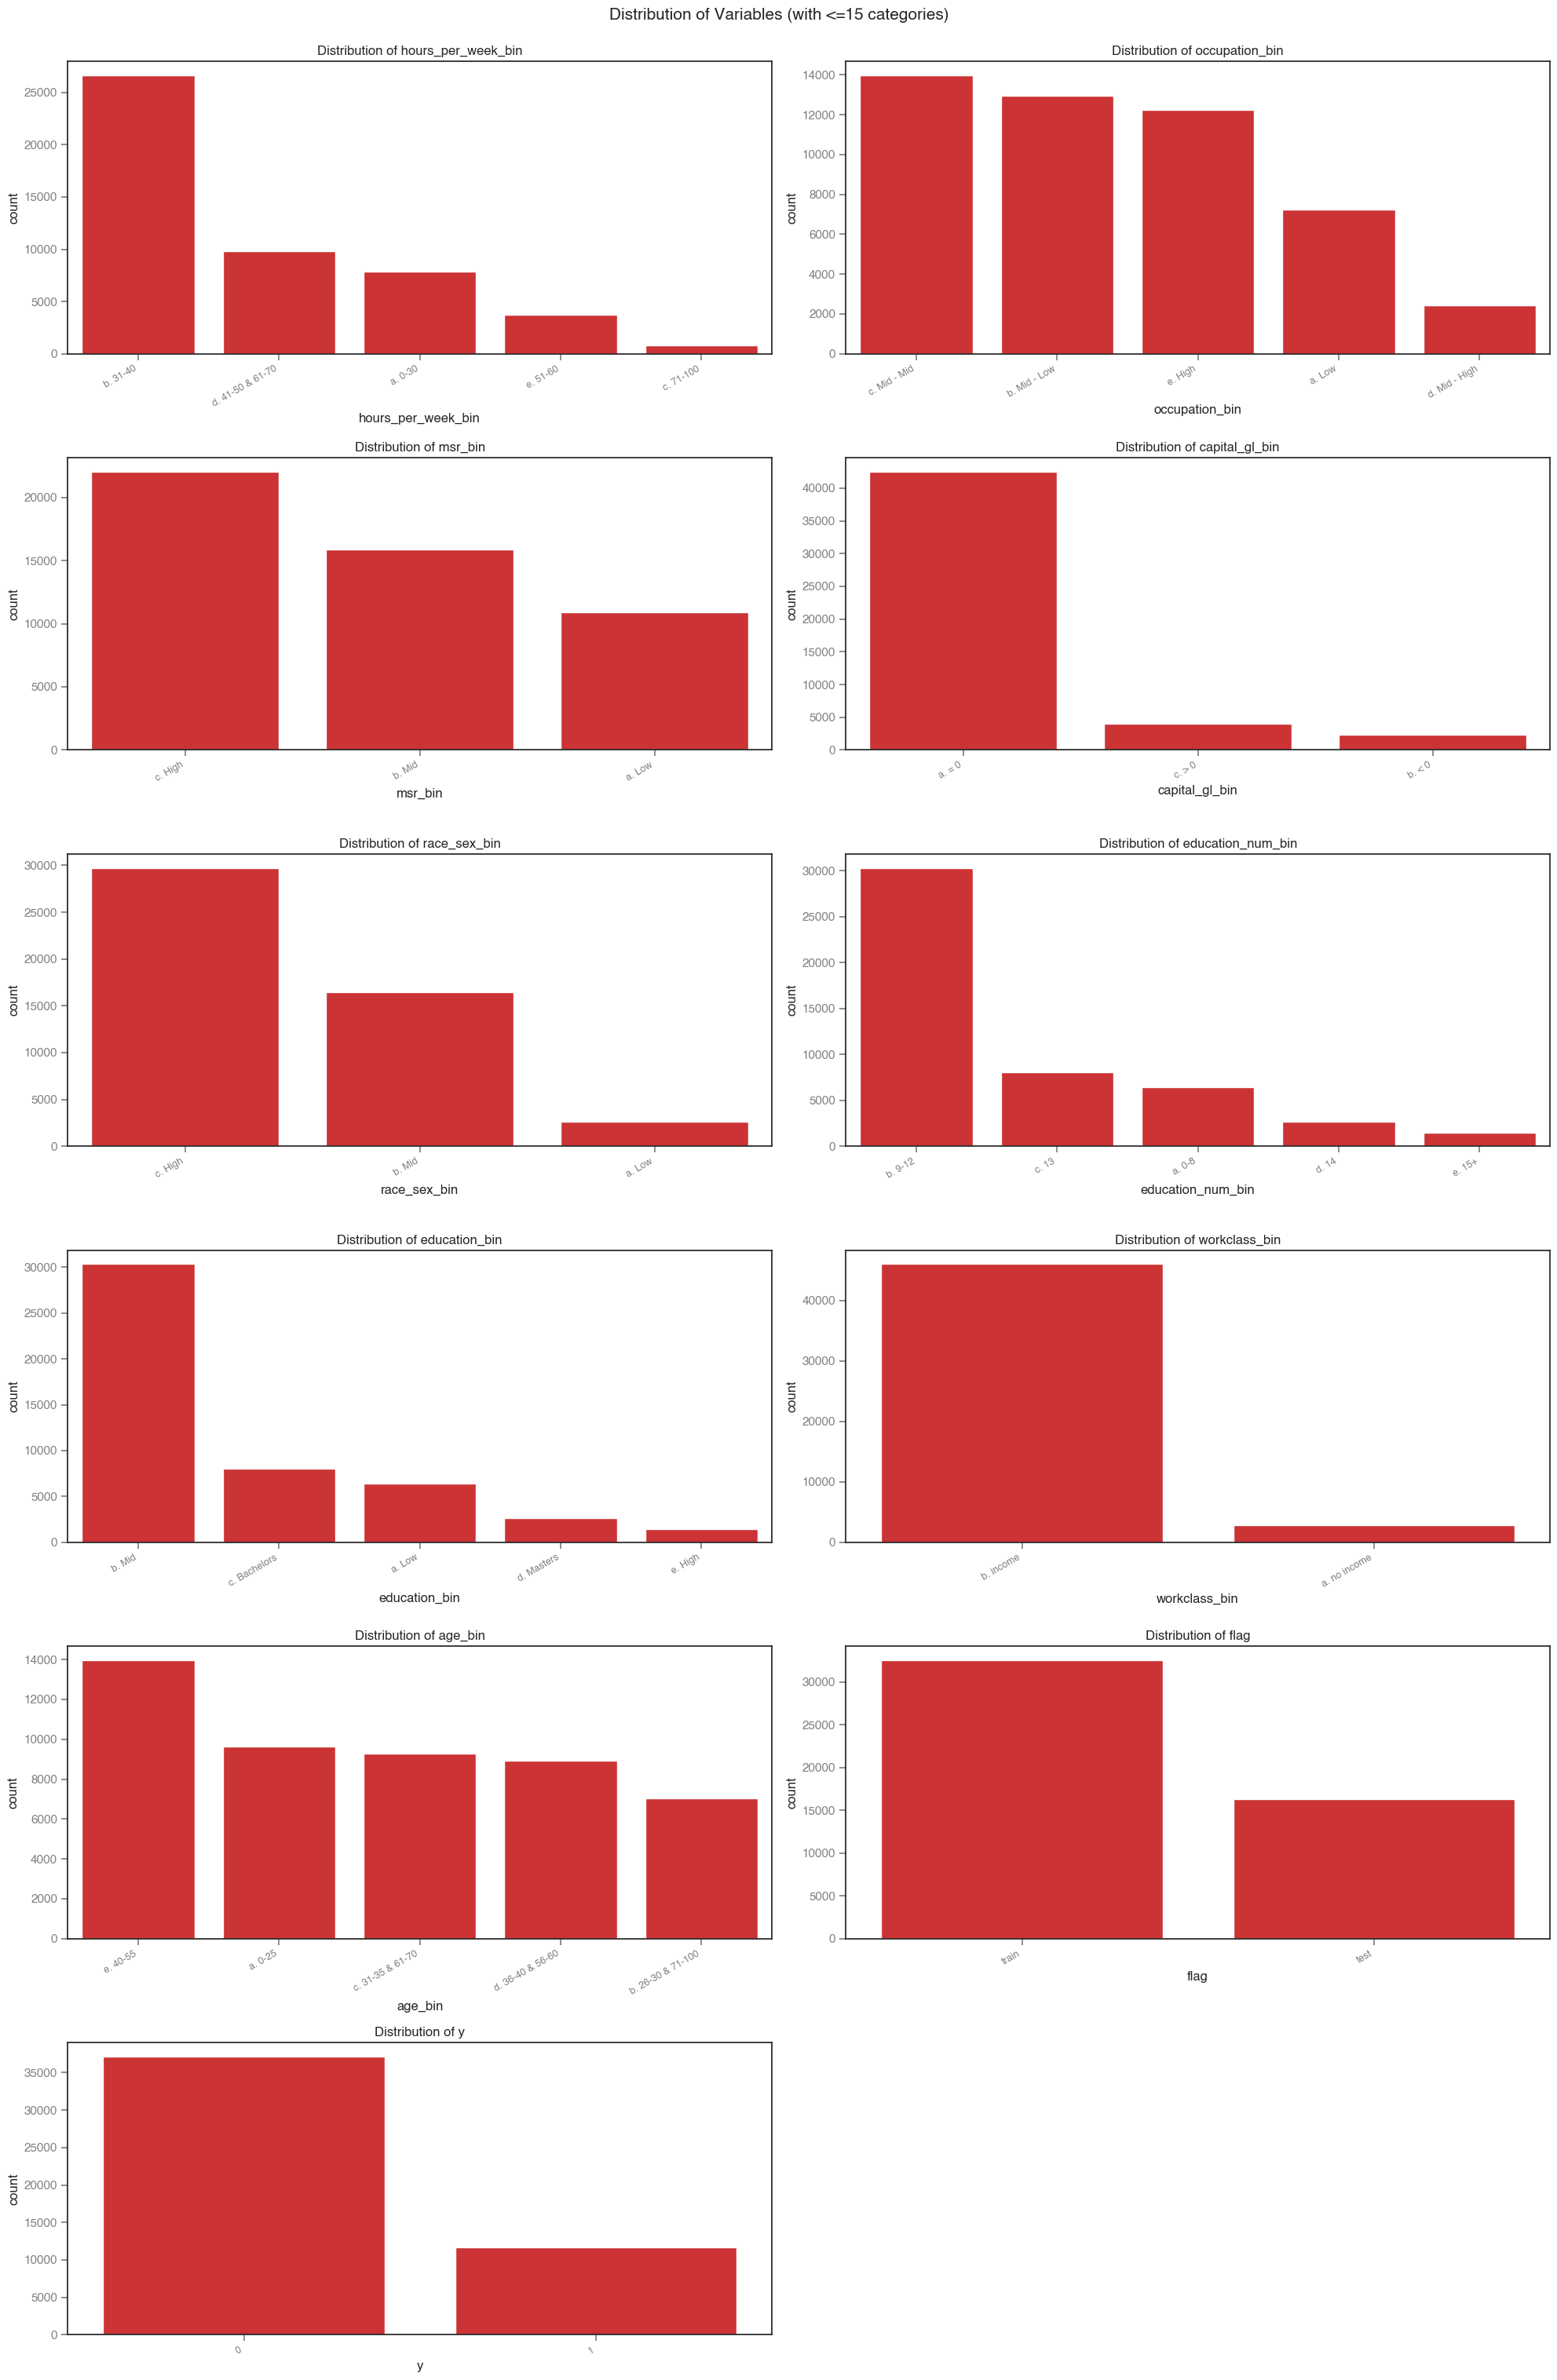

All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


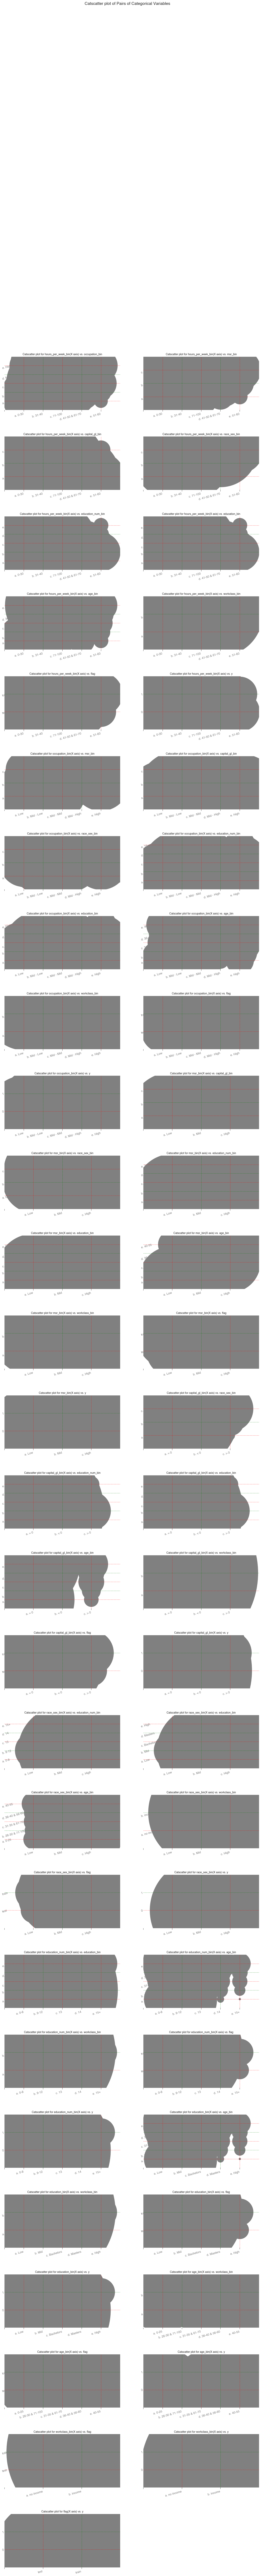

In [136]:
#Using AutoViz to generate a data quality report for the dataset
AV = AutoViz_Class()
report = AV.AutoViz(filename="", dfte=df)

In [137]:
# Sum of null values for each column
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

# 3. Build Decision Tree Classifier Models

In [138]:
#Define the feature and target variable columns
X = df.drop(columns=['y', 'flag'])
y = df['y']

In [139]:
# Encode the feature columns based on the bins in the dataset
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in X.columns:
    X[col] = encoder.fit_transform(X[col])

In [140]:
#Define training and test slices for feature and target variables
x_train = X[df['flag'] == 'train']
y_train = y[df['flag'] == 'train']
x_test = X[df['flag'] == 'test']
y_test = y[df['flag'] == 'test']

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
#Initiate model
dtree= DecisionTreeClassifier(max_depth=10, random_state=23, max_features=None, min_samples_leaf=15)

In [143]:
#Train mdoel
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=23)

In [144]:
#Predict using trained model
ypred=dtree.predict(x_test)
ypred

array([0, 0, 0, ..., 1, 1, 1])

# 4. Evaluate Decision Tree Performance

In [145]:
%matplotlib inline

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
#Develop a confusion matrix that distirnguishes between true/false and positive/negative observations
cm = confusion_matrix(y_test, ypred)

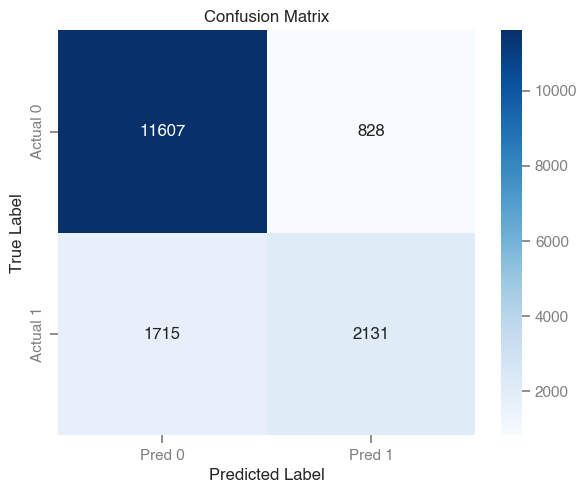

In [148]:
#Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [149]:
#Import accuracy and performance metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [150]:
# define performance metrics based on the dataset
accuracy = accuracy_score(y_test, ypred)
precision = precision_score(y_test, ypred)
recall = recall_score(y_test, ypred)
f1 = f1_score(y_test, ypred)

In [151]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, ypred))

Accuracy: 0.8438
Precision: 0.7202
Recall: 0.5541
F1-Score: 0.6263

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.55      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.80      0.74      0.76     16281
weighted avg       0.84      0.84      0.84     16281



# 5. Tune Decision Tree Performance

In [152]:
%matplotlib inline

## Run 1: Split Criteria

In [153]:
#Initiliazing a decision tree with gini split criteria
dtree_gini= DecisionTreeClassifier(criterion="gini")
dtree_gini.fit(x_train,y_train)
y_pred_gini=dtree_gini.predict(x_test)

In [154]:
#Accuracy, precision, recall, and F1 Score for gini split criteria
gini_accuracy=np.mean(y_test==y_pred_gini).round(4)
gini_precision = precision_score(y_test, y_pred_gini).round(4)
gini_recall = recall_score(y_test, y_pred_gini).round(4)
gini_f1 = f1_score(y_test, y_pred_gini).round(4)
print(f"Accuracy w/ gini: {gini_accuracy}")
print(f"Precision w/ gini: {gini_precision}")
print(f"Recall w/ gini: {gini_recall}")
print(f"F1 Score w/ gini: {gini_f1}")

Accuracy w/ gini: 0.8369
Precision w/ gini: 0.6932
Recall w/ gini: 0.5551
F1 Score w/ gini: 0.6165


In [155]:
#Initiliazing a decision tree with entropy split criteria
dtree_entropy= DecisionTreeClassifier(criterion="entropy")
dtree_entropy.fit(x_train,y_train)
y_pred_entropy=dtree_entropy.predict(x_test)

In [156]:
#Accuracy, precision, recall, and F1 Score for entropy split criteria
entropy_accuracy=np.mean(y_test==y_pred_entropy)
entropy_precision = precision_score(y_test, y_pred_entropy)
entropy_recall = recall_score(y_test, y_pred_entropy)
entropy_f1 = f1_score(y_test, y_pred_entropy)
print(f"Accuracy w/ entropy: {entropy_accuracy}")
print(f"Precision w/ entropy: {entropy_precision}")
print(f"Recall w/ entropy: {entropy_recall}")
print(f"F1 Score w/ entropy: {entropy_f1}")

Accuracy w/ entropy: 0.8367422148516676
Precision w/ entropy: 0.6927319922128488
Recall w/ entropy: 0.5551222048881955
F1 Score w/ entropy: 0.6163394919168592


In [157]:
split_criteria_data = {
    "Accuracy": [gini_accuracy, entropy_accuracy],
    "Precision": [gini_precision, entropy_precision],
    "Recall": [gini_recall, entropy_recall],
    "F1 Score": [gini_f1, entropy_f1]
}

# Create a DataFrame with row labels
df_results = pd.DataFrame(split_criteria_data, index=["Gini", "Entropy"])

# Display the table
print(df_results)


         Accuracy  Precision   Recall   F1 Score
Gini     0.836900  0.693200   0.555100  0.616500
Entropy  0.836742  0.692732   0.555122  0.616339


## Run 2: Minimum Sample Leaf

In [158]:
#Initializing model for minimum sample leaf options
leaf_accuracy_results = []
leaf_precision_results=[]
leaf_recall_results=[]
leaf_f1_results=[]

min_leaf_options=[5,10,15,20,25,30,35,40]

for option in min_leaf_options:
    dtree_leaf = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=option)
    model_leaf = dtree_leaf.fit(x_train,y_train)
    y_pred_leaf=dtree_leaf.predict(x_test)
    
    accuracy_leaf=np.mean(y_test==y_pred_leaf)
    leaf_precision = precision_score(y_test, y_pred_leaf).round(4)
    leaf_recall = recall_score(y_test, y_pred_leaf).round(4)
    leaf_f1 = f1_score(y_test, y_pred_leaf).round(4)
    
    leaf_accuracy_results.append(accuracy_leaf)
    leaf_precision_results.append(leaf_precision)
    leaf_recall_results.append(leaf_recall)
    leaf_f1_results.append(leaf_f1)

In [159]:
#Displaying model performance for minimum sample leaf options
leaf_results_df = pd.DataFrame({
    "Accuracy": leaf_accuracy_results,
    "Precision": leaf_precision_results,
    "Recall": leaf_recall_results,
    "F1 Score": leaf_f1_results
}, index=min_leaf_options)

print(leaf_results_df)

    Accuracy  Precision  Recall  F1 Score
5   0.839998   0.7022    0.5603   0.6233 
10  0.839629   0.7009    0.5601   0.6226 
15  0.842454   0.7079    0.5671   0.6297 
20  0.841656   0.7036    0.5697   0.6296 
25  0.842147   0.7051    0.5702   0.6305 
30  0.843069   0.7125    0.5627   0.6288 
35  0.843007   0.7146    0.5585   0.6270 
40  0.843806   0.7168    0.5601   0.6288 


<function matplotlib.pyplot.show(close=None, block=None)>

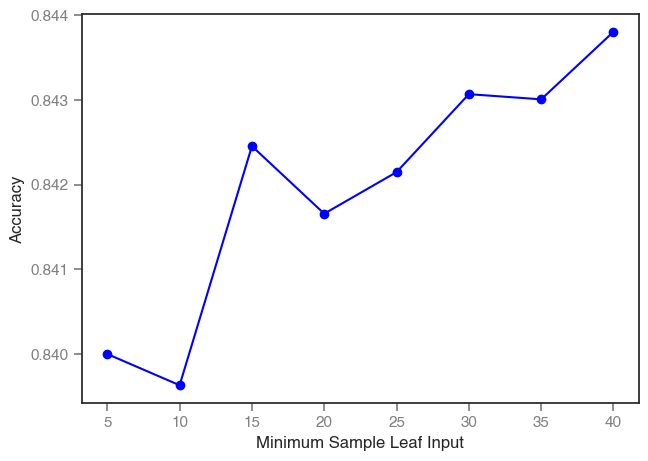

In [160]:
#Plotting accuracy scores for each minimum sample leaf option
plt.plot(min_leaf_options, leaf_accuracy_results, marker='o', linestyle='-', label='Accuracy',color='blue')
plt.xlabel('Minimum Sample Leaf Input')
plt.ylabel("Accuracy")
plt.show

## Run 3: Maximum Feature

In [161]:
#Initializing model for maximum feature options
feature_accuracy_results = []
feature_precision_results=[]
feature_recall_results=[]
feature_f1_results=[]

feature_options=[None,.3,.4,.5,.6,.7,.8]

for option in feature_options:
    dtree_features = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=40,max_features=option)
    model_features = dtree_features.fit(x_train,y_train)
    y_pred_features=dtree_features.predict(x_test)
    
    feature_accuracy=np.mean(y_test==y_pred_features)
    feature_precision = precision_score(y_test, y_pred_features).round(4)
    feature_recall = recall_score(y_test, y_pred_features).round(4)
    feature_f1 = f1_score(y_test, y_pred_features).round(4)
    
    feature_accuracy_results.append(feature_accuracy)
    feature_precision_results.append(feature_precision)
    feature_recall_results.append(feature_recall)
    feature_f1_results.append(feature_f1)

In [162]:
#Displaying performance metrics for maximum feature options
feature_results_df = pd.DataFrame({
    "Accuracy": feature_accuracy_results,
    "Precision": feature_precision_results,
    "Recall": feature_recall_results,
    "F1 Score": feature_f1_results
}, index=feature_options)

print(feature_results_df)

     Accuracy  Precision  Recall  F1 Score
NaN  0.843806   0.7168    0.5601   0.6288 
0.3  0.824028   0.6512    0.5491   0.5959 
0.4  0.841410   0.7112    0.5533   0.6224 
0.5  0.841472   0.7053    0.5650   0.6274 
0.6  0.842700   0.7021    0.5803   0.6354 
0.7  0.844727   0.7155    0.5689   0.6338 
0.8  0.843806   0.7217    0.5515   0.6252 


<function matplotlib.pyplot.show(close=None, block=None)>

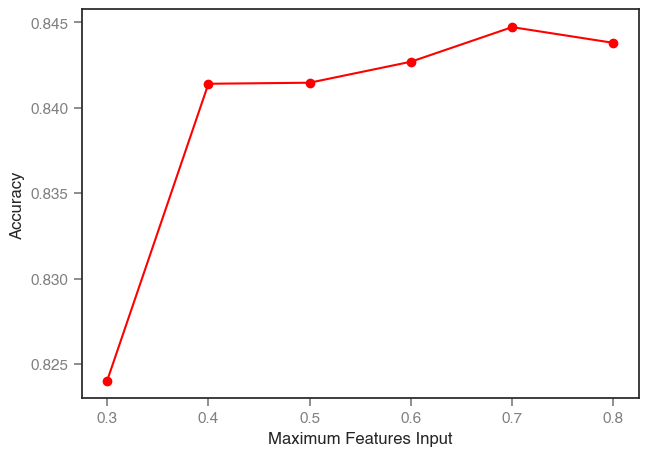

In [163]:
#Plotting accuracy scores for maximum feature options
plt.plot(feature_options, feature_accuracy_results, marker='o', linestyle='-', label='Accuracy',color='red')
plt.xlabel('Maximum Features Input')
plt.ylabel("Accuracy")
plt.show

## Run 4: Maximum Depth

In [164]:
#Initializing model for maximum depth options
depth_accuracy_results = []
depth_precision_results = []
depth_recall_results = []
depth_f1_results = []

depth_options = [2, 4, 6, 8, 10, 12, 14, 16]

for option in depth_options:
    dtree_depth = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=40, max_features=.8, max_depth=option)
    model_depth = dtree_depth.fit(x_train, y_train)
    y_pred_depth = dtree_depth.predict(x_test)
    
    depth_accuracy = np.mean(y_test == y_pred_depth)
    depth_precision = precision_score(y_test, y_pred_depth).round(4)
    depth_recall = recall_score(y_test, y_pred_depth).round(4)
    depth_f1 = f1_score(y_test, y_pred_depth).round(4)
    
    depth_accuracy_results.append(depth_accuracy)
    depth_precision_results.append(depth_precision)
    depth_recall_results.append(depth_recall)
    depth_f1_results.append(depth_f1)

In [165]:
#Displaying performance metrics for maximum depth options
depth_results_df = pd.DataFrame({
    "Accuracy": depth_accuracy_results,
    "Precision": depth_precision_results,
    "Recall": depth_recall_results,
    "F1 Score": depth_f1_results
}, index=depth_options)

print(depth_results_df)

    Accuracy  Precision  Recall  F1 Score
2   0.821755   0.7159    0.4069   0.5189 
4   0.835514   0.6978    0.5356   0.6061 
6   0.839813   0.7486    0.4847   0.5884 
8   0.845587   0.7133    0.5790   0.6392 
10  0.844666   0.7215    0.5577   0.6291 
12  0.843990   0.7151    0.5645   0.6309 
14  0.844973   0.7119    0.5775   0.6377 
16  0.843621   0.7159    0.5603   0.6286 


<function matplotlib.pyplot.show(close=None, block=None)>

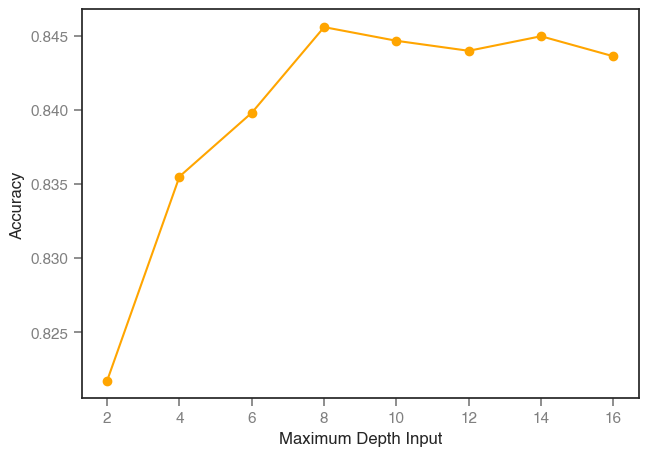

In [166]:
#Plotting accuracy scores for maximum depth options
plt.plot(depth_options, depth_accuracy_results, marker='o', linestyle='-', label='Accuracy',color='orange')
plt.xlabel('Maximum Depth Input')
plt.ylabel("Accuracy")
plt.show

Best hyper-parameters: DecisionTreeClassifier(criterion="entropy", min_samples_leaf=40, max_features=.8, max_depth=14)

# 6. Visualize Best Performing Decision Tree

In [167]:
#Initializing decision tree with refined hyper parameters
dtree_final=DecisionTreeClassifier(criterion="entropy", min_samples_leaf=40, max_features=.8, max_depth=14)

In [168]:
#Training refined model
dtree_final.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features=0.8,
                       min_samples_leaf=40)

In [169]:
#Making predicitons with refined model
final_prediction=dtree_final.predict(x_test)
final_prediction

array([0, 0, 0, ..., 1, 1, 1])

In [170]:
#Performance metrics of refined model
final_accuracy = accuracy_score(y_test, final_prediction)
final_precision = precision_score(y_test, final_prediction)
final_recall = recall_score(y_test, final_prediction)
final_f1 = f1_score(y_test, final_prediction)

print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")

Accuracy: 0.8444
Precision: 0.7210
Recall: 0.5569
F1-Score: 0.6284


In [171]:
import graphviz
print(graphviz.__version__)

0.20.3


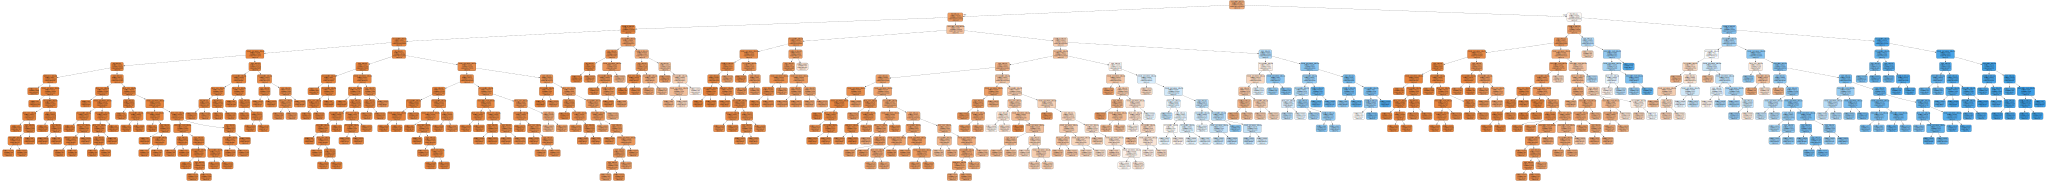

In [172]:
#Visualizing the decision tree inline in the Jupyter Notebook
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Train the best decision tree model using the best accuracy result
best_tree = DecisionTreeClassifier(
    criterion="entropy",
    max_features=0.8,
    min_samples_leaf=40,
    max_depth=14,
    random_state=23
)
best_tree.fit(x_train, y_train)

# Generate the DOT format of the decision tree
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=x_train.columns,
    class_names=["0", "1"],  # Modify class labels if needed
    filled=True,
    rounded=True,
    special_characters=True
)

# Create the graph and display it in the notebook
graph = graphviz.Source(dot_data, format="svg")  # Set format to 'svg' for inline display
display(graph)  # Display the graph inline in the Jupyter Notebook


In [173]:
#Visualizing the decision tree as a pdf
from sklearn.tree import export_graphviz
import graphviz

# Train the best decision tree model using the best accuracy result
best_tree = DecisionTreeClassifier(
    criterion="entropy",
    max_features=.8,
    min_samples_leaf=40,
    max_depth=14,
    random_state=23
)
best_tree.fit(x_train, y_train)

# Visualizing the decision tree using GraphViz
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=x_train.columns,
    class_names=["0", "1"],  # Modify class labels if needed
    filled=True,
    rounded=True,
    special_characters=True
)

# Render and display the tree
graph = graphviz.Source(dot_data)
graph.view()  # Opens the visualization

'Source.gv.pdf'

# 7. Conclusion

#### Q.4  How long was your total run time to train the best model?

In [174]:
import time

start_time = time.time()  # Record start time
dtree_final.fit(x_train, y_train)  # Train the model
end_time = time.time()  # Record end time

runtime = end_time - start_time  # Calculate runtime
print(f"Training time: {runtime:.4f} seconds")

Training time: 0.0329 seconds


##### Q.5 Did you find the BEST TREE?

Considering that there are limitless trees based on the options of hyperparameters involved in training the model, I would not say I found the "best" tree possible. There are more calculations to take into account when it comes to evaluating the best possible tree, so all I can say is that I found the best performing tree given the finite options of hyperparameters in this assignment.

#### Q.6 Write your observations from the visualization of the best tree

The first split is the education bin of the dataset meaning that this feature has a lot of predictive power in terms of deciding the target variable. There are also more splits if the education bin less than or equal to 1.5 showing that more levels and splits are required to develop pure trees and that there is more nuance if the education bin is equal to or below 1.5.

#### Q.7 Will this Tree “overfit”?

This tree is fully grown given the hyper parameters because it reached 14 levels and aligns with the thresholds laid out in the hyperparameters of the training model code.

# 8. Prediction using your “trained” Decision Tree Model

In [175]:
#Create a binned version of the sample data provided in the assignment
sample_data = {
    "hours_per_week_bin": "e. 51-60",
    "occupation_bin": "b. Mid - Low",
    "msr_bin": "c. High",
    "capital_gl_bin": "c. > 0",
    "race_sex_bin": "b. Mid",
    "education_num_bin": "b. 9-12",
    "education_bin": "e. High",
    "workclass_bin": "b. income",
    "age_bin": "d. 36-40 & 56-60"
}

In [176]:
#Encode the binned data in the same way the trained data is encoded using LabelEncoder()
train_data = df[df['flag'] == 'train'].drop(columns=['y', 'flag'])

# Fit LabelEncoders on the training data
encoders = {}
for col in train_data.columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    encoders[col] = le  # Store encoder for later use

# Encode the sample row using the stored encoders
sample_row_encoded = {col: encoders[col].transform([sample_data[col]])[0] for col in sample_data}

print(sample_row_encoded)

{'hours_per_week_bin': 4, 'occupation_bin': 1, 'msr_bin': 2, 'capital_gl_bin': 2, 'race_sex_bin': 1, 'education_num_bin': 1, 'education_bin': 4, 'workclass_bin': 1, 'age_bin': 3}


In [177]:
#Create a DataFrame of the encoded single row of data
df_sample = pd.DataFrame([sample_row_encoded])
df_sample

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,4,1,2,2,1,1,4,1,3


In [178]:
#Use the "best" decision tree model hyper parameters to train a model and predict the outcome for the sample data created above
final_dtree= DecisionTreeClassifier(max_depth=15, random_state=23, max_features=.8, min_samples_leaf=40)
final_dtree.fit(x_train,y_train)
final_y_pred=final_dtree.predict(df_sample)
final_y_pred
# Get probability predictions
final_y_proba = final_dtree.predict_proba(df_sample) #use the df_sample dataset

# Get class labels from the model
class_labels = final_dtree.classes_

# Create a dictionary to map class labels to their probabilities
proba_dict = dict(zip(class_labels, final_y_proba[0]))

# Q8. Print the probabilities for each class
print(f'Predicted value: {final_y_pred}')
print(f'Predicted value probabilities: {proba_dict}')

Predicted value: [1]
Predicted value probabilities: {0: 0.21052631578947367, 1: 0.7894736842105263}
